In [52]:
import keras_cv

## TensorFlow Datasets

In [53]:
import numpy as np; import matplotlib.pyplot as plt; import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf; import tensorflow_datasets as tfds

### Muestra todos los datasets disponibles de la base de datos

In [4]:
list = tfds.list_builders()
print(f'Primeros 100 de {len(list)}:', list[:100])

2024-12-04 14:06:25.104697: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Primeros 100 de 1296: ['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'ai2dcaption', 'aloha_mobile', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bot_adversarial_dialogue', 'bridge', 'bridge_data_msr', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltec

### Obtención de metadatos de un dataset

In [5]:
ds, info = tfds.load('mnist', with_info=True)
print(info)

Dl Completed...: 100%|██████████| 5/5 [00:05<00:00,  1.15s/ file]
I0000 00:00:1733315296.522762    5772 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Dataset mnist downloaded and prepared to /home/david/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/home/david/tensorflow_datasets/mnist/incomplete.MUI8MP_3.0.1/',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burge

## Ejercicio: haz un experimento similar con Cats vs Dogs y split=['train[:50%]', 'train[80%:]']

In [54]:
import os; os.environ["KERAS_BACKEND"] = "tensorflow"; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np; import matplotlib.pyplot as plt
import tensorflow as tf; import tensorflow_datasets as tfds; import keras; import keras_cv
keras.utils.set_random_seed(23)
(train,test),info = tfds.load("cats_vs_dogs", split=[ 'train[:50%]', 'train[80%:]'], with_info=True, as_supervised=True)

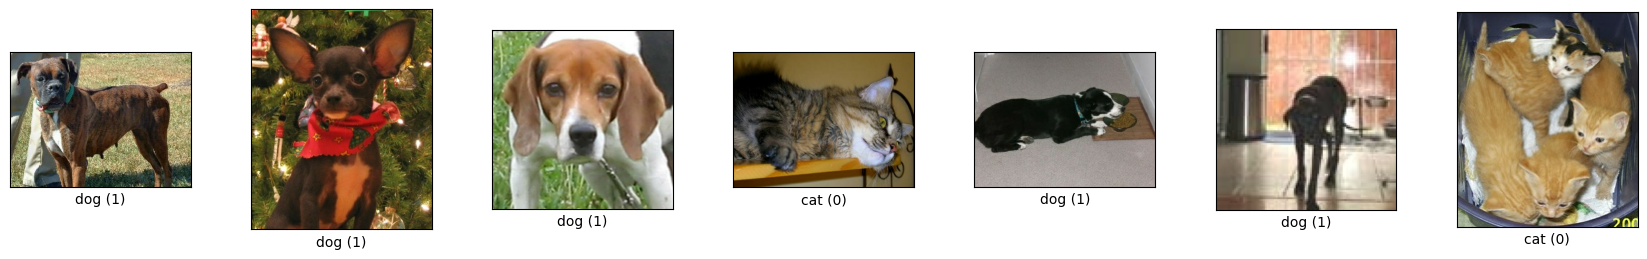

In [55]:
fig = tfds.show_examples(train, info, rows=1, cols=7)

### Tratamiento del dataset antes de entrenar la red. NORMALIZACIÓN

In [56]:
resize = keras_cv.layers.Resizing(224,224,interpolation="nearest", pad_to_aspect_ratio=True)
def normalize_images(images, labels):
    return tf.cast(images, tf.float32), tf.one_hot(labels, 10)
train = train.map(normalize_images, num_parallel_calls=tf.data.AUTOTUNE)
batch_size = 32; train = train.cache().shuffle(10 * batch_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test = test.map(normalize_images, num_parallel_calls=tf.data.AUTOTUNE)
test = test.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

### Entrenamiento del modelo ajustando parametros

In [58]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=(28, 28, 1)),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10)])
model.compile(
optimizer=keras.optimizers.Adam(0.001),
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train, epochs=6, validation_data=test);

Epoch 1/6


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 10), output.shape=(None, 10)